# Uncovering Factors that Lead to Employee Attrition

<img src="https://www.vocoli.com/media/26040/reduce-employee-turnover.png" alt="employee attrition" style="width:500px;"/>

## Introduction
This project uses dataset "IBM HR Analytics Employee Attrition & Performance" from [kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). The dataset contains employee background such as education, environment satisfaction, job satisfaction, 
performance, work life balance and more over that lead to employee attrition. 

## Datasets
- WA_Fn-UseC_-HR-Employee-Attrition.csv

## Problem
Uncover the factors that lead to employee attrition

## What is Employee Attrition
Employee attrition refers to the loss of employees through a number of circumstances, such as resignation and retirement. The cause of attrition may be either voluntary or involuntary, though employer-initiated events such as layoffs are not typically included in the definition. Source [Wisgeek](https://www.wisegeek.com/what-is-employee-attrition.htm)

There are many factors that affect attrition. Every company or work place has unique factors. Some companies say employee attrition may be caused by a culture that doesn't encourage staff engagement and feel unappreciated. And there are certain types of attrition like
- retirement
- voluntary attrition
- involuntary attrition
- internal attrition
- demographic attrition

In summary points, attrition may be caused by some factors such as
- personal motivation : a change in the personal life or goals
- professional motivation : lack of opportunities 
- workplace challenge : lack of challenges
- job not being right for an employee

## Table of Contents
1. [Dataset Preparation](#preparation)
<br>1.1 [Import Libraries](#11)
<br>1.2 [Load Data](#12)
2. [Exploratory Data Analysis](#exploratory-data-analysis)
<br>2.1 [General Information](#21)
<br>2.2 [Gender](#22)
<br>2.3 [Education](#23)
<br>2.4 [Income](#24)
<br>2.5 [Working Environment](#25)
3. [Modeling Data](#modeling-data)
4. [Conclusion](#conclusion)

## <a name="preparation">1. Dataset Preparation</a>

### <a name="11">1.1 Import Libraries</a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
sns.set_palette("Set2")
pd.options.display.max_columns = None

### <a name="12">1.2 Load Data</a>

In [5]:
df = pd.read_csv('../datasets/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### Summary of Dataset
Before we deep dive into exploratory data analysis, there are some questions that we can ask to ourselves.}

#### Questions
- <b>Data Structure:</b> How many columns and rows is there in this dataset?
- <b>Data Type:</b> Kind of types that we are dealing in this dataset
- <b>Missing values:</b>Are there missing values?
- <b>Meaning of Data:</b> What does this dataset mean? Is it categorical (nominal, ordinal) or numerical?
- <b>Label:</b> Label in dataset that we would like to figure out
- <b>Label Distribution:</b> Is it left/right-skewed or symmetric? Imbalanced or balanced?

#### Summary
- <b>Data Structure:</b> There are 35 columns and 1470 rows
- <b>Data Type:</b> We only have two types number and string
- <b>Missing values:</b> No missing values detected
- <b>Meaning of Data:</b> Most of the values are ordered categorical or ordinal. Especially for columns that related to satisfaction which have values from 1(low) to 5(high)
- <b>Label:</b> The main purpose is to figure out attrition factors

Percentage %
Attrition
No     83.877551
Yes    16.122449
Name: EmployeeCount, dtype: float64


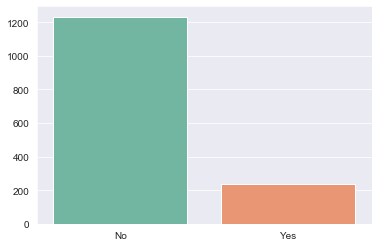

In [39]:
count_attrition = df.groupby(['Attrition']).count()
sns.barplot(x=list(count_attrition.index), y=list(count_attrition['EmployeeCount']))

print('Percentage %')
print(count_attrition['EmployeeCount']*100/count_attrition['EmployeeCount'].sum())

- <b>Label Distribution:</b> From above, we figure out that Attrition label looks like <b>imbalanced</b>. Theare are <b>83.87 %</b> who said No and <b>16.12 %</b> Yes. Knowing this imbalanced dataset can be used later in predictive model. 

## <a name="exploratory-data-analysis">2. Exploratory Data Analysis</a> 

## <a name="modeling-data">3. Modeling Data</a>

## <a name="conclusion">4. Conclusion</a>